In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Tree_Classifier.csv to Tree_Classifier.csv


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout, BatchNormalization

In [4]:
data = pd.read_csv("Tree_Classifier.csv")

In [5]:
print(data.columns)

Index(['Species', 'No. of leaflets in the leafblade',
       'Height of the leafblade', 'Width of the middle leafblade',
       'The average angle of the top leaflets'],
      dtype='object')


In [6]:
X = data[['No. of leaflets in the leafblade',
       'Height of the leafblade', 'Width of the middle leafblade',
       'The average angle of the top leaflets']]
y = data['Species']

In [7]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = Sequential()
model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(24, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.2302 - accuracy: 0.4912 - val_loss: 1.0398 - val_accuracy: 0.2000
Epoch 2/50
1/1 [==============================] - 0s 38ms/step - loss: 1.1432 - accuracy: 0.4561 - val_loss: 1.0316 - val_accuracy: 0.2000
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 1.3181 - accuracy: 0.4386 - val_loss: 1.0232 - val_accuracy: 0.2000
Epoch 4/50
1/1 [==============================] - 0s 37ms/step - loss: 1.2756 - accuracy: 0.4737 - val_loss: 1.0148 - val_accuracy: 0.2667
Epoch 5/50
1/1 [==============================] - 0s 57ms/step - loss: 1.1667 - accuracy: 0.4912 - val_loss: 1.0072 - val_accuracy: 0.2667
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 1.1398 - accuracy: 0.5439 - val_loss: 0.9997 - val_accuracy: 0.2667
Epoch 7/50
1/1 [==============================] - 0s 39ms/step - loss: 1.1656 - accuracy: 0.4737 - val_loss: 0.9919 - val_accuracy: 0.2667
Epoch 8/50
1/1 [=============

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 24ms/step - loss: 0.6985 - accuracy: 0.8889
Test Accuracy: 0.8889


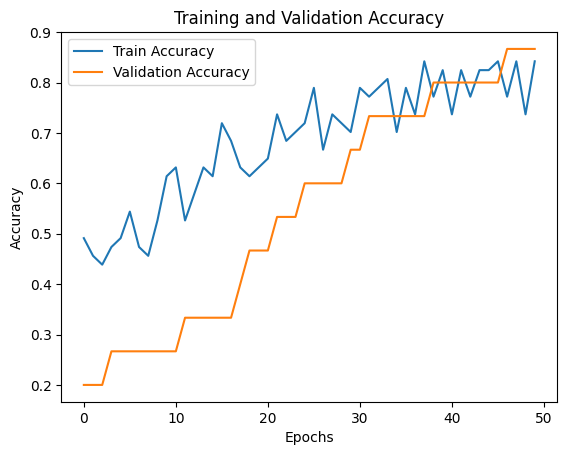

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

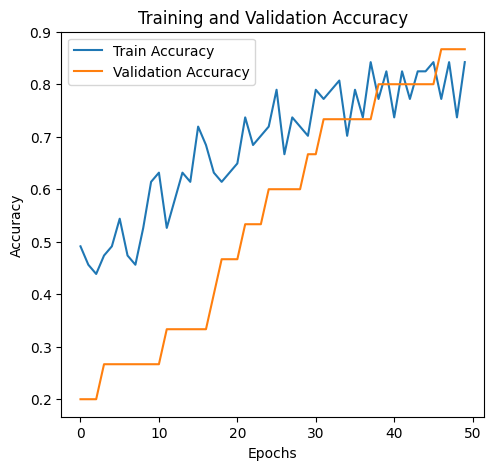

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [17]:
history = model.fit(X_train, y_train,
                    epochs=50,  # Start with a higher number of epochs
                    batch_size=512,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/50
1/1 [==============================] - 0s 92ms/step - loss: 0.4260 - accuracy: 0.8246 - val_loss: 0.7126 - val_accuracy: 0.8667
Epoch 2/50
1/1 [==============================] - 0s 38ms/step - loss: 0.4867 - accuracy: 0.7193 - val_loss: 0.7080 - val_accuracy: 0.8667
Epoch 3/50
1/1 [==============================] - 0s 41ms/step - loss: 0.4668 - accuracy: 0.7719 - val_loss: 0.7032 - val_accuracy: 0.8667
Epoch 4/50
1/1 [==============================] - 0s 38ms/step - loss: 0.3306 - accuracy: 0.8596 - val_loss: 0.6987 - val_accuracy: 0.8667
Epoch 5/50
1/1 [==============================] - 0s 42ms/step - loss: 0.3677 - accuracy: 0.9123 - val_loss: 0.6941 - val_accuracy: 0.8667
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 0.3895 - accuracy: 0.8246 - val_loss: 0.6895 - val_accuracy: 0.8667
Epoch 7/50
1/1 [==============================] - 0s 58ms/step - loss: 0.4389 - accuracy: 0.8070 - val_loss: 0.6847 - val_accuracy: 0.8667
Epoch 8/50
1/1 [===========

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 26ms/step - loss: 0.4571 - accuracy: 1.0000
Test Accuracy: 1.0000


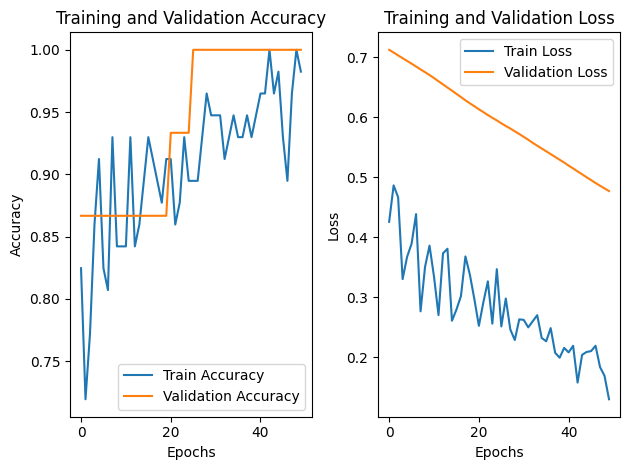

In [19]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [20]:
print(f'Training stopped after {len(history.epoch)} epochs')

Training stopped after 50 epochs


In [21]:
from sklearn.model_selection import GridSearchCV

In [25]:
predictions = model.predict(X_test)

predicted_classes = np.argmax(predictions, axis=1)

predicted_classes = label_encoder.inverse_transform(predicted_classes)

for i in range(min(50, len(X_test))):
    print(f"Predicted class: {predicted_classes[i]}, Actual class: {label_encoder.inverse_transform([y_test[i]])[0]}")


1/1 [==============================] - 0s 79ms/step
Predicted class: 1, Actual class: 1
Predicted class: 0, Actual class: 0
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 0, Actual class: 0
Predicted class: 0, Actual class: 0
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 0, Actual class: 0
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 1, Actual class: 1
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 0, Actual class: 0
Predicted class: 0, Actual class: 0
Predicted class: 0, Actual class: 0
Predicted class: 0, Actual class: 0


In [24]:
print(f'Training stopped after {len(history.epoch)} epochs')

predictions = model.predict(X_test)

predicted_classes = np.argmax(predictions, axis=1)

predicted_classes = label_encoder.inverse_transform(predicted_classes)

for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, Actual class: {label_encoder.inverse_transform([y_test[i]])[0]}")

Training stopped after 50 epochs
1/1 [==============================] - 0s 31ms/step
Predicted class: 1, Actual class: 1
Predicted class: 0, Actual class: 0
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 0, Actual class: 0
Predicted class: 0, Actual class: 0
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 0, Actual class: 0
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 1, Actual class: 1
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 0, Actual class: 0
Predicted class: 0, Actual class: 0
Predicted class: 0, Actual class: 0
Predicted class: 0, Actual class: 0
